Titanic Data

In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from ggplot import *

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

   PassengerId  Pclass  Sex   Age     Fare  Embarked
0            1       3    1  22.0   7.2500       2.0
1            2       1    0  38.0  71.2833       0.0
2            3       3    0  26.0   7.9250       2.0
3            4       1    0  35.0  53.1000       2.0
4            5       3    1  35.0   8.0500       2.0
(0.94736842105263153, 18)


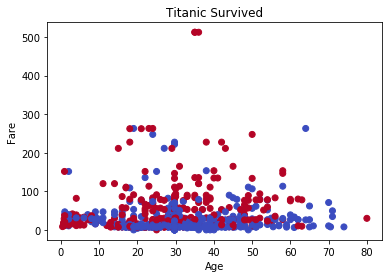

In [73]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
for k in ('Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'):
    del data_train[k]
    del data_test[k]
features_test = data_test
labels_test = pd.read_csv('gender_submission.csv')
del labels_test['PassengerId']
#print (data_train)

    
#print(data_train[:,:])
#plt.plot(data_train['PassengerId'], data_train['Survived'], 'ro')
#plt.axis([0, 5,0 ,1])

labels_train = data_train['Survived']
del data_train['Survived']

features_train = data_train
features_train['Sex'] =  np.where(features_train['Sex']=='male',1,0)
features_test['Sex'] = np.where(features_test['Sex']=='male',1,0)

features_train = features_train.replace(['C','Q','S'],[0,1,2])
features_test = features_test.replace(['C','Q','S'],[0,1,2])
print(features_train.head())
mu = features_train['Age'].mean()
features_train['Age'] = features_train['Age'].fillna(mu)
mu = features_train['Fare'].mean()
features_train['Fare'] = features_train['Fare'].fillna(mu)
features_train['Embarked'] = features_train['Embarked'].fillna(0)
mu = features_test['Age'].mean()

features_test['Age'] = features_test['Age'].fillna(mu)
mu = features_test['Fare'].mean()
features_test['Fare'] = features_test['Fare'].fillna(mu)
features_test['Embarked'] = features_test['Embarked'].fillna(0)
#features_train = features_train.dropna()
#features_test = features_test.dropna()
from sklearn import tree
from sklearn.metrics import accuracy_score
acc = list(tuple())
for s in range(2,101):
    clf = tree.DecisionTreeClassifier(min_samples_split=25,min_samples_leaf=s)
    clf.fit(features_train,labels_train)
    pred = clf.predict(features_test)
    #print(len(pred))
    
    acc.append((accuracy_score(pred, labels_test),s))
print(max(acc))
clf = tree.DecisionTreeClassifier(min_samples_split=25,min_samples_leaf=18)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
passengerId = [int(x) for x in range(892,1310)]
#print(passengerId)
train = {'PassengerId':pd.Series(passengerId),'Survived':pd.Series(pred)}
train = pd.DataFrame(train)
train.to_csv('titanic.csv',index=False)

#plt.scatter(features_test[:,0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(features_train['Age'],features_train['Fare'], c=labels_train, cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('Fare')

plt.title("Titanic Survived")
plt.show()